<b>HW7</b> <br>
<b>Name:</b> Varun Pradeep Joshi <br>
<b>Github Username:</b> varunjoshi29 <br>
<b> Usc Id:</b> 1747956384

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from collections import defaultdict
import statistics
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

In [2]:
def print_bold(text):
    print('\033[1m' + text + '\033[0m')

### 1. Multi-class and Multi-Label Classification Using Support Vector Machines

#### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [3]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df.drop('RecordID', axis=1, inplace=True)
df.head()

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  \
0 -0.150063 -0.171128  0.124676  ... -0.024017 -0.108351 -0.077623 -0.009568   
1 -0.222475 -0.207693  0.170883  ...  0.012022 -0.090974 -0.056510 -0.035303   
2 -0.242234 -0.219153  0.232538  ...  0.083536 -0.050691 -0.023590 -0.066722   
3 -0.194347 -0.098181  0.270375  ... -0.050224 -0.136009 -0.177037 -0.130498   
4 -0.265423 -0.172700  0.266434  ...  0.062837 -0.048885 -0.053074 -0.088550   

   MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus         Species  
0  0.057684  0.118680  0.014038  Leptodactylidae  Adenomera  AdenomeraAndre  
1  0.020140  0.082263  0.029056  Leptodactylidae  Adenomera  AdenomeraAndre  
2 -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera  AdenomeraAndre  
3 -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera  AdenomeraAndre  
4 -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera  AdenomeraAndre  

[5 rows x 25 columns]

In [4]:
X, Y = df[df.columns[:22]], df[df.columns[22:]]

In [5]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

**(i) Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.**

Exact Match : This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.

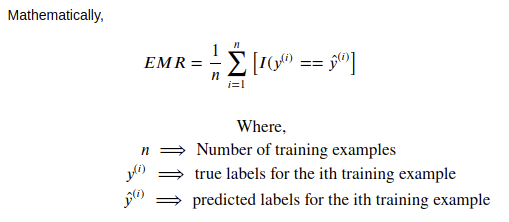

Hamming Loss: The fraction of the wrong labels to the total number of labels, which is :

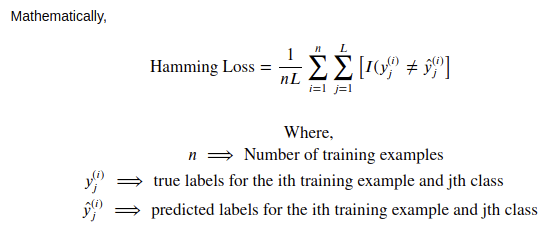

**(ii) Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try
to solve the problem with both standardized and raw attributes and report the results.**

In [6]:
Cs = [10 ** i for i in range(-3, 4)]
gammas = [i/10 for i in range(1, 21, 1)]

In [7]:
OneVsRestClassifier(SVC()).get_params().keys()

dict_keys(['estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

In [8]:
svm_clf = OneVsRestClassifier(SVC())

In [9]:
hyper_parameters = {'estimator__gamma':gammas, 'estimator__C': Cs}

In [10]:
cv = KFold(10)

In [11]:
grid_search_model = GridSearchCV(svm_clf, param_grid=hyper_parameters, cv=cv)

**Label 1 : Family**

In [13]:
family_model = grid_search_model.fit(df_x_train, df_y_train['Family'])

In [14]:
family_model.best_params_

{'estimator__C': 10, 'estimator__gamma': 2.0}

In [15]:
y_test_pred_family = family_model.predict(df_x_test)
exact_score_family = accuracy_score(y_test_pred_family, df_y_test['Family'])

In [16]:
hamming_loss_family = hamming_loss(y_test_pred_family, df_y_test['Family'])

In [17]:
print("For Label: Family")
print(f"Best svm penalty (C) = {family_model.best_params_['estimator__C']}")
print(f"Best svm width (gamma) = {family_model.best_params_['estimator__gamma']}")
print(f"Exact Match Score = {exact_score_family}")
print(f"Hamming Loss = {hamming_loss_family}")

For Label: Family
Best svm penalty (C) = 10
Best svm width (gamma) = 2.0
Exact Match Score = 0.9944418712366836
Hamming Loss = 0.00555812876331635


**Label 2 : Genus**

In [18]:
genus_model = grid_search_model.fit(df_x_train, df_y_train['Genus'])

In [19]:
genus_model.best_params_

{'estimator__C': 10, 'estimator__gamma': 2.0}

In [20]:
y_test_pred_genus = genus_model.predict(df_x_test)
exact_score_genus = accuracy_score(y_test_pred_genus, df_y_test['Genus'])

In [21]:
hamming_loss_genus = hamming_loss(y_test_pred_genus, df_y_test['Genus'])

In [22]:
print("For Label: Genus")
print(f"Best svm penalty (C) = {genus_model.best_params_['estimator__C']}")
print(f"Best svm width (gamma) = {genus_model.best_params_['estimator__gamma']}")
print(f"Exact Match Score = {exact_score_genus}")
print(f"Hamming Loss = {hamming_loss_genus}")

For Label: Genus
Best svm penalty (C) = 10
Best svm width (gamma) = 2.0
Exact Match Score = 0.9907364520611394
Hamming Loss = 0.009263547938860583


**Label 3 : Species**

In [24]:
species_model = grid_search_model.fit(df_x_train, df_y_train['Species'])

In [25]:
species_model.best_params_

{'estimator__C': 10, 'estimator__gamma': 1.5}

In [26]:
y_test_pred_species = species_model.predict(df_x_test)
exact_score_species = accuracy_score(y_test_pred_species, df_y_test['Species'])

In [27]:
hamming_loss_species = hamming_loss(y_test_pred_species, df_y_test['Species'])

In [28]:
print("For Label: Species")
print(f"Best svm penalty (C) = {species_model.best_params_['estimator__C']}")
print(f"Best svm width (gamma) = {species_model.best_params_['estimator__gamma']}")
print(f"Exact Match Score = {exact_score_species}")
print(f"Hamming Loss = {hamming_loss_species}")

For Label: Species
Best svm penalty (C) = 10
Best svm width (gamma) = 1.5
Exact Match Score = 0.9907364520611394
Hamming Loss = 0.009263547938860583


**Gaussian SVM Results**

In [29]:
avg_hamming_loss_gauss = (hamming_loss_family + hamming_loss_genus + hamming_loss_species)/3

In [30]:
arr_y_test_family = df_y_test['Family'].ravel()
arr_y_test_genus = df_y_test['Genus'].ravel()
arr_y_test_species = df_y_test['Species'].ravel()

In [31]:
matched = 0
for i in range(len(df_y_test)):
    if (arr_y_test_family[i]==y_test_pred_family[i] and arr_y_test_genus[i]==y_test_pred_genus[i] and 
        arr_y_test_species[i]==y_test_pred_species[i]):
        matched += 1
avg_exact_score_gauss = matched/len(df_y_test)

In [32]:
print('Avg Exact Match Score:', avg_exact_score_gauss)
print('Avg Hamming Loss:', avg_hamming_loss_gauss)

Avg Exact Match Score: 0.9884205650764243
Avg Hamming Loss: 0.008028408213679172


**(iii) Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.**

In [33]:
std_scaler = StandardScaler()
std_scaler.fit(df_x_train)
df_x_train_scaled = std_scaler.transform(df_x_train)
df_x_test_scaled = std_scaler.transform(df_x_test)

In [34]:
svm_clf_L1 = LinearSVC(penalty='l1', dual=False)
hyper_parameters_L1 = {'C':Cs}
grid_search_L1_model = GridSearchCV(svm_clf_L1, hyper_parameters_L1, cv=cv)

**Label 1 : Family**

In [36]:
family_model_scaled_l1 = grid_search_L1_model.fit(df_x_train_scaled, df_y_train['Family'])

In [37]:
family_model_scaled_l1.best_params_

{'C': 10}

In [38]:
y_test_pred_scaled_family_l1 = family_model_scaled_l1.predict(df_x_test_scaled)
exact_score_family_l1 = accuracy_score(y_test_pred_scaled_family_l1, df_y_test['Family'])

In [39]:
hamming_loss_family_l1 = hamming_loss(y_test_pred_scaled_family_l1, df_y_test['Family'])

In [40]:
print("For Label: Family (L1)")
print(f"Best svm penalty (C) = {family_model_scaled_l1.best_params_['C']}")
print(f"Exact Match Score = {exact_score_family_l1}")
print(f"Hamming Loss = {hamming_loss_family_l1}")

For Label: Family (L1)
Best svm penalty (C) = 10
Exact Match Score = 0.9282075034738305
Hamming Loss = 0.07179249652616952


**Label 2 : Genus**

In [42]:
genus_model_scaled_l1 = grid_search_L1_model.fit(df_x_train_scaled, df_y_train['Genus'])

In [43]:
genus_model_scaled_l1.best_params_

{'C': 100}

In [44]:
y_test_pred_scaled_genus_l1 = genus_model_scaled_l1.predict(df_x_test_scaled)
exact_score_genus_l1 = accuracy_score(y_test_pred_scaled_genus_l1, df_y_test['Genus'])

In [45]:
hamming_loss_genus_l1 = hamming_loss(y_test_pred_scaled_genus_l1, df_y_test['Genus'])

In [46]:
print("For Label: Genus (L1)")
print(f"Best svm penalty (C) = {genus_model_scaled_l1.best_params_['C']}")
print(f"Exact Match Score = {exact_score_genus_l1}")
print(f"Hamming Loss = {hamming_loss_genus_l1}")

For Label: Genus (L1)
Best svm penalty (C) = 100
Exact Match Score = 0.9416396479851783
Hamming Loss = 0.058360352014821676


**Label 3 : Species**

In [47]:
species_model_scaled_l1 = grid_search_L1_model.fit(df_x_train_scaled, df_y_train['Species'])

In [48]:
species_model_scaled_l1.best_params_

{'C': 100}

In [49]:
y_test_pred_scaled_species_l1 = species_model_scaled_l1.predict(df_x_test_scaled)
exact_score_species_l1 = accuracy_score(y_test_pred_scaled_species_l1, df_y_test['Species'])

In [50]:
hamming_loss_species_l1 = hamming_loss(y_test_pred_scaled_species_l1, df_y_test['Species'])

In [51]:
print("For Label: Species (L1)")
print(f"Best svm penalty (C) = {species_model_scaled_l1.best_params_['C']}")
print(f"Exact Match Score = {exact_score_species_l1}")
print(f"Hamming Loss = {hamming_loss_species_l1}")

For Label: Species (L1)
Best svm penalty (C) = 100
Exact Match Score = 0.9592403890690134
Hamming Loss = 0.04075961093098657


In [52]:
avg_hamming_loss_l1_svm = (hamming_loss_family_l1 + hamming_loss_genus_l1 + hamming_loss_species_l1)/3

In [53]:
matched = 0
for i in range(len(df_y_test)):
    if (arr_y_test_family[i]==y_test_pred_scaled_family_l1[i] and arr_y_test_genus[i]==y_test_pred_scaled_genus_l1[i] and 
        arr_y_test_species[i]==y_test_pred_scaled_species_l1[i]):
        matched += 1
avg_exact_score_l1_svm = matched/len(df_y_test)

**L1 Penalized SVM Results**

In [54]:
print('Avg Exact Match Score (L1):', avg_exact_score_l1_svm)
print('Avg Hamming Loss (L1):', avg_hamming_loss_l1_svm)

Avg Exact Match Score (L1): 0.9124594719777674
Avg Hamming Loss (L1): 0.05697081982399258


**(iv) Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.**

In [55]:
svm_clf_L1 = LinearSVC(penalty='l1', dual=False)
hyper_parameters_L1 = {'model__C':Cs}

In [56]:
steps = [('over', SMOTE()), ('model', svm_clf_L1)]
pipeline = Pipeline(steps=steps)

In [57]:
pipeline.get_params()

{'memory': None,
 'steps': [('over', SMOTE()), ('model', LinearSVC(dual=False, penalty='l1'))],
 'verbose': False,
 'over': SMOTE(),
 'model': LinearSVC(dual=False, penalty='l1'),
 'over__k_neighbors': 5,
 'over__n_jobs': None,
 'over__random_state': None,
 'over__sampling_strategy': 'auto',
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__loss': 'squared_hinge',
 'model__max_iter': 1000,
 'model__multi_class': 'ovr',
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__tol': 0.0001,
 'model__verbose': 0}

In [58]:
grid_search_L1_model_smote = GridSearchCV(pipeline, hyper_parameters_L1, cv=cv)

**Label 1 : Family**

In [60]:
gs_L1_model_smote_family = grid_search_L1_model_smote.fit(df_x_train_scaled, df_y_train['Family'])

In [61]:
gs_L1_model_smote_family.best_params_

{'model__C': 1}

In [62]:
y_test_pred_scaled_family_l1_smote = gs_L1_model_smote_family.predict(df_x_test_scaled)
exact_score_family_l1_smote = accuracy_score(y_test_pred_scaled_family_l1_smote, df_y_test['Family'])

In [63]:
hamming_loss_family_l1_smote = hamming_loss(y_test_pred_scaled_family_l1_smote, df_y_test['Family'])

In [64]:
print("For Label: Family (L1 Smote)")
print(f"Best svm penalty (C) = {gs_L1_model_smote_family.best_params_['model__C']}")
print(f"Exact Match Score = {exact_score_family_l1_smote}")
print(f"Hamming Loss = {hamming_loss_family_l1_smote}")

For Label: Family (L1 Smote)
Best svm penalty (C) = 1
Exact Match Score = 0.9073645206113942
Hamming Loss = 0.09263547938860583


**Label 2 : Genus**

In [66]:
gs_L1_model_smote_genus = grid_search_L1_model_smote.fit(df_x_train_scaled, df_y_train['Genus'])

In [67]:
gs_L1_model_smote_genus.best_params_

{'model__C': 10}

In [68]:
y_test_pred_scaled_genus_l1_smote = gs_L1_model_smote_family.predict(df_x_test_scaled)
exact_score_genus_l1_smote = accuracy_score(y_test_pred_scaled_genus_l1_smote, df_y_test['Genus'])

In [69]:
hamming_loss_genus_l1_smote = hamming_loss(y_test_pred_scaled_genus_l1_smote, df_y_test['Genus'])

In [72]:
print("For Label: Genus (L1 Smote)")
print(f"Best svm penalty (C) = {gs_L1_model_smote_genus.best_params_['model__C']}")
print(f"Exact Match Score = {exact_score_genus_l1_smote}")
print(f"Hamming Loss = {hamming_loss_genus_l1_smote}")

For Label: Genus (L1 Smote)
Best svm penalty (C) = 10
Exact Match Score = 0.9110699397869384
Hamming Loss = 0.0889300602130616


**Label 3 : Species**

In [74]:
gs_L1_model_smote_species = grid_search_L1_model_smote.fit(df_x_train_scaled, df_y_train['Species'])

In [75]:
gs_L1_model_smote_species.best_params_

{'model__C': 100}

In [76]:
y_test_pred_scaled_species_l1_smote = gs_L1_model_smote_family.predict(df_x_test_scaled)
exact_score_species_l1_smote = accuracy_score(y_test_pred_scaled_species_l1_smote, df_y_test['Species'])

In [77]:
hamming_loss_species_l1_smote = hamming_loss(y_test_pred_scaled_species_l1_smote, df_y_test['Species'])

In [80]:
print("For Label: Species (L1 Smote)")
print(f"Best svm penalty (C) = {gs_L1_model_smote_species.best_params_['model__C']}")
print(f"Exact Match Score = {exact_score_species_l1_smote}")
print(f"Hamming Loss = {hamming_loss_species_l1_smote}")

For Label: Species (L1 Smote)
Best svm penalty (C) = 100
Exact Match Score = 0.9592403890690134
Hamming Loss = 0.04075961093098657


In [81]:
avg_hamming_loss_l1_smote = (hamming_loss_family_l1_smote + hamming_loss_genus_l1_smote + hamming_loss_species_l1_smote)/3

In [82]:
matched = 0
for i in range(len(df_y_test)):
    if (arr_y_test_family[i]==y_test_pred_scaled_family_l1_smote[i] \
        and arr_y_test_genus[i]==y_test_pred_scaled_genus_l1_smote[i] and 
        arr_y_test_species[i]==y_test_pred_scaled_species_l1_smote[i]):
        matched += 1
avg_exact_score_l1_smote = matched/len(df_y_test)

**L1 Penalized with Smote SVM Results**

In [85]:
print('Avg Exact Match Score (L1 & Smote):', avg_exact_score_l1_smote)
print('Avg Hamming Loss (L1 & Smote):', avg_hamming_loss_l1_smote)

Avg Exact Match Score (L1 & Smote): 0.8633626679
Avg Hamming Loss (L1 & Smote): 0.07410838351088467


**Summary of Results**

In [86]:
summary = pd.DataFrame()
summary['Model'] = ['Gaussian Kernel SVM','L1 Penalized SVM', 'L1 Penalized SVM after SMOTE']
summary['Avg Exact Match Score'] = [avg_exact_score_gauss, avg_exact_score_l1_svm, avg_exact_score_l1_smote] 
summary['Avg Hamming Loss'] = [avg_hamming_loss_gauss, avg_hamming_loss_l1_svm, avg_hamming_loss_l1_smote] 
#DataFrame built using results found before
summary

Model  Avg Exact Match Score  Avg Hamming Loss
0           Gaussian Kernel SVM               0.988421          0.008028
1              L1 Penalized SVM               0.912459          0.056971
2  L1 Penalized SVM after SMOTE               0.863363          0.074108

**As seen from above results and based on both ExactMatchScore and HammingLoss, we can say that Gaussian Kernel SVM model is giving us the best results.**

### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

**Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.**

a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ { 1 , 2 , . . . , 50 } automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know

In [6]:
best_k_per_iteration = {}
cluster_labels_per_iteration = {}
for iteration in range(1, 51):
    best_silhoutte_score = -1
    best_k_value = 0
    for k in range(2,51):
        kMeansModel = KMeans(n_clusters=k, random_state=iteration)
        cluster_labels = kMeansModel.fit_predict(X)
        silhouette_score_ = silhouette_score(X, cluster_labels)
        if best_silhoutte_score < silhouette_score_:
            best_silhoutte_score = silhouette_score_
            best_k_value = k
            
    best_k_per_iteration[iteration] = best_k_value
    final_model_for_iteration = KMeans(n_clusters=best_k_value, random_state=iteration)
    cluster_labels_per_iteration[iteration] = final_model_for_iteration.fit_predict(X)

In [7]:
for key, value in best_k_per_iteration.items():
    print(f"Iteration : {key}, Optimal Number of Clusters : {value} ")

Iteration : 1, Optimal Number of Clusters : 4 
Iteration : 2, Optimal Number of Clusters : 4 
Iteration : 3, Optimal Number of Clusters : 4 
Iteration : 4, Optimal Number of Clusters : 4 
Iteration : 5, Optimal Number of Clusters : 4 
Iteration : 6, Optimal Number of Clusters : 4 
Iteration : 7, Optimal Number of Clusters : 4 
Iteration : 8, Optimal Number of Clusters : 4 
Iteration : 9, Optimal Number of Clusters : 4 
Iteration : 10, Optimal Number of Clusters : 4 
Iteration : 11, Optimal Number of Clusters : 4 
Iteration : 12, Optimal Number of Clusters : 4 
Iteration : 13, Optimal Number of Clusters : 4 
Iteration : 14, Optimal Number of Clusters : 4 
Iteration : 15, Optimal Number of Clusters : 4 
Iteration : 16, Optimal Number of Clusters : 4 
Iteration : 17, Optimal Number of Clusters : 4 
Iteration : 18, Optimal Number of Clusters : 4 
Iteration : 19, Optimal Number of Clusters : 4 
Iteration : 20, Optimal Number of Clusters : 4 
Iteration : 21, Optimal Number of Clusters : 4 
I

(b) In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [8]:
results_for_iterations = []
dict_iteration_cluster_labels = {}
for iteration in range(1, 51): # 50 Iterations for Monte Carlo
    optimal_k = best_k_per_iteration[iteration]
    index_labels_assigned = cluster_labels_per_iteration[iteration]
    cluster_labels = []
    for i in range(optimal_k): # traverse over each cluster 0, 1, 2..., optimal_k - 1
        family_count = defaultdict(int)
        genus_count = defaultdict(int)
        species_count = defaultdict(int)
        for j in range(len(Y)):
            if index_labels_assigned[j] == i:
                family_count[Y['Family'][j]] += 1
                genus_count[Y['Genus'][j]] += 1
                species_count[Y['Species'][j]] += 1

        family_label_majority_value = sorted(family_count.items(), key=lambda pair: pair[1], reverse=True)[0][0]
        genus_label_majority_value = sorted(genus_count.items(), key=lambda pair: pair[1], reverse=True)[0][0]
        species_label_majority_value = sorted(species_count.items(), key=lambda pair: pair[1], reverse=True)[0][0]
    
        cluster_labels.append({
            'Family': family_label_majority_value,
            'Genus': genus_label_majority_value,
            'Species': species_label_majority_value
        })
  
    for i in range(optimal_k): # traverse over each cluster 0, 1, 2..., optimal_k - 1
        results_for_iterations.append({
            'Iteration' : iteration,
            'Cluster' : i,
            'Family': cluster_labels[i]['Family'],
            'Genus' : cluster_labels[i]['Genus'],
            'Species' : cluster_labels[i]['Species']
        })
        dict_iteration_cluster_labels[f'{iteration}_{i}'] = {
            'Family': cluster_labels[i]['Family'],
            'Genus' : cluster_labels[i]['Genus'],
            'Species' : cluster_labels[i]['Species']
        }
        

In [9]:
summary_cluster_label_per_iteration = pd.DataFrame(results_for_iterations)

In [10]:
pd.set_option('display.max_rows', len(summary_cluster_label_per_iteration))
display(summary_cluster_label_per_iteration)
pd.reset_option('display.max_rows')

Iteration  Cluster           Family      Genus                 Species
0            1        0          Hylidae  Hypsiboas    HypsiboasCinerascens
1            1        1    Dendrobatidae   Ameerega      Ameeregatrivittata
2            1        2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3            1        3          Hylidae  Hypsiboas       HypsiboasCordobae
4            2        0          Hylidae  Hypsiboas       HypsiboasCordobae
5            2        1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
6            2        2          Hylidae  Hypsiboas       HypsiboasCordobae
7            2        3  Leptodactylidae  Adenomera          AdenomeraAndre
8            3        0          Hylidae  Hypsiboas       HypsiboasCordobae
9            3        1          Hylidae  Hypsiboas    HypsiboasCinerascens
10           3        2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
11           3        3    Dendrobatidae   Ameerega      Ameeregatrivittata
12           4        0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
13           4        1          Hylidae  Hypsiboas       HypsiboasCordobae
14           4        2          Hylidae  Hypsiboas    HypsiboasCinerascens
15           4        3    Dendrobatidae   Ameerega      Ameeregatrivittata
16           5        0    Dendrobatidae   Ameerega      Ameeregatrivittata
17           5        1          Hylidae  Hypsiboas       HypsiboasCordobae
18           5        2          Hylidae  Hypsiboas    HypsiboasCinerascens
19           5        3  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
20           6        0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
21           6        1          Hylidae  Hypsiboas       HypsiboasCordobae
22           6        2          Hylidae  Hypsiboas    HypsiboasCinerascens
23           6        3    Dendrobatidae   Ameerega      Ameeregatrivittata
24           7        0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
25           7        1          Hylidae  Hypsiboas       HypsiboasCordobae
26           7        2    Dendrobatidae   Ameerega      Ameeregatrivittata
27           7        3          Hylidae  Hypsiboas    HypsiboasCinerascens
28           8        0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
29           8        1    Dendrobatidae   Ameerega      Ameeregatrivittata
30           8        2          Hylidae  Hypsiboas       HypsiboasCordobae
31           8        3          Hylidae  Hypsiboas    HypsiboasCinerascens
32           9        0          Hylidae  Hypsiboas       HypsiboasCordobae
33           9        1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
34           9        2    Dendrobatidae   Ameerega      Ameeregatrivittata
35           9        3          Hylidae  Hypsiboas    HypsiboasCinerascens
36          10        0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
37          10        1          Hylidae  Hypsiboas       HypsiboasCordobae
38          10        2    Dendrobatidae   Ameerega      Ameeregatrivittata
39          10        3          Hylidae  Hypsiboas    HypsiboasCinerascens
40          11        0          Hylidae  Hypsiboas    HypsiboasCinerascens
41          11        1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
42          11        2          Hylidae  Hypsiboas       HypsiboasCordobae
43          11        3    Dendrobatidae   Ameerega      Ameeregatrivittata
44          12        0          Hylidae  Hypsiboas    HypsiboasCinerascens
45          12        1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
46          12        2    Dendrobatidae   Ameerega      Ameeregatrivittata
47          12        3          Hylidae  Hypsiboas       HypsiboasCordobae
48          13        0          Hylidae  Hypsiboas       HypsiboasCordobae
49          13        1          Hylidae  Hypsiboas    HypsiboasCinerascens
50          13        2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
51          13        3    Dendrobatidae   Ameerega  

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [14]:
avg_hamming_loss = []
avg_hamming_score = []
avg_hamming_distance = []

actual_family_labels = np.array(Y['Family'])
actual_genus_labels = np.array(Y['Genus'])
actual_species_labels = np.array(Y['Species'])

for iteration in range(1, 51):
    assigned_cluster_indices = cluster_labels_per_iteration[iteration]
    pred_family = []
    pred_genus = []
    pred_species = []
    for i in range(len(X)):
        cluster_name = assigned_cluster_indices[i]
        pred_family.append(dict_iteration_cluster_labels[f'{iteration}_{cluster_name}']['Family'])
        pred_genus.append(dict_iteration_cluster_labels[f'{iteration}_{cluster_name}']['Genus'])
        pred_species.append(dict_iteration_cluster_labels[f'{iteration}_{cluster_name}']['Species'])
        
    family_hamming_loss = hamming_loss(pred_family, actual_family_labels)
    family_hamming_score = accuracy_score(pred_family, actual_family_labels)
    family_hamming_distance = family_hamming_loss * len(pred_family)
    
    genus_hamming_loss = hamming_loss(pred_genus, actual_genus_labels)
    genus_hamming_score = accuracy_score(pred_genus, actual_genus_labels)
    genus_hamming_distance = genus_hamming_loss * len(pred_genus)
 
    species_hamming_loss = hamming_loss(pred_species, actual_species_labels)
    species_hamming_score = accuracy_score(pred_species, actual_species_labels)
    species_hamming_distance = species_hamming_loss * len(pred_species)
    
    avg_hamming_loss.append((family_hamming_loss + genus_hamming_loss + species_hamming_loss)/3)
    avg_hamming_score.append((family_hamming_score + genus_hamming_score + species_hamming_score)/3)
    avg_hamming_distance.append(int(family_hamming_distance + genus_hamming_distance + species_hamming_distance))
    

In [15]:
hamming_summary = []
for iteration in range(1, 51):
    hamming_summary.append({
        'Iteration' : iteration,
        'Hamming Distance' : avg_hamming_distance[iteration - 1],
        'Hamming Score' : avg_hamming_score[iteration - 1],
        'Hamming Loss' : avg_hamming_loss[iteration - 1]
        })

In [16]:
pd.set_option('display.max_rows', len(pd.DataFrame(hamming_summary)))
display(pd.DataFrame(hamming_summary))
pd.reset_option('display.max_rows')

Iteration  Hamming Distance  Hamming Score  Hamming Loss
0           1              4801       0.777577      0.222423
1           2              5294       0.754737      0.245263
2           3              4801       0.777577      0.222423
3           4              4801       0.777577      0.222423
4           5              4801       0.777577      0.222423
5           6              4801       0.777577      0.222423
6           7              4801       0.777577      0.222423
7           8              4801       0.777577      0.222423
8           9              4801       0.777577      0.222423
9          10              4801       0.777577      0.222423
10         11              4801       0.777577      0.222423
11         12              4801       0.777577      0.222423
12         13              4802       0.777531      0.222469
13         14              4801       0.777577      0.222423
14         15              4802       0.777531      0.222469
15         16              4801       0.777577      0.222423
16         17              5045       0.766273      0.233727
17         18              4801       0.777577      0.222423
18         19              4787       0.778226      0.221774
19         20              5052       0.765949      0.234051
20         21              4801       0.777577      0.222423
21         22              4801       0.777577      0.222423
22         23              4802       0.777531      0.222469
23         24              4801       0.777577      0.222423
24         25              4801       0.777577      0.222423
25         26              4801       0.777577      0.222423
26         27              4802       0.777531      0.222469
27         28              4801       0.777577      0.222423
28         29              4795       0.777855      0.222145
29         30              4801       0.777577      0.222423
30         31              4801       0.777577      0.222423
31         32              4801       0.777577      0.222423
32         33              4801       0.777577      0.222423
33         34              4016       0.813945      0.186055
34         35              4801       0.777577      0.222423
35         36              4801       0.777577      0.222423
36         37              4801       0.777577      0.222423
37         38              4801       0.777577      0.222423
38         39              4801       0.777577      0.222423
39         40              4801       0.777577      0.222423
40         41              4801       0.777577      0.222423
41         42              4801       0.777577      0.222423
42         43              4801       0.777577      0.222423
43         44              4801       0.777577      0.222423
44         45              4787       0.778226      0.221774
45         46              4801       0.777577      0.222423
46         47              4801       0.777577      0.222423
47         48              6045       0.719944      0.280056
48         49              4801       0.777577      0.222423
49         50              4801       0.777577      0.222423

In [17]:
mean_hamming_loss = statistics.mean(avg_hamming_loss)
std_hamming_loss = statistics.stdev(avg_hamming_loss)

mean_hamming_score = statistics.mean(avg_hamming_score)
std_hamming_score = statistics.stdev(avg_hamming_score)

mean_hamming_distance = statistics.mean(avg_hamming_distance)
std_hamming_distance = statistics.stdev(avg_hamming_distance)

avg_iterations_mean_std_d = [
    {
     'Metric': 'Average', 
     'Hamming Distance': mean_hamming_distance, 'Hamming Score' : mean_hamming_score, 'Hamming Loss' : mean_hamming_loss
    },
    {
     'Metric': 'Standard Deviation',
     'Hamming Distance':std_hamming_distance, 'Hamming Score' : std_hamming_score, 'Hamming Loss' : std_hamming_loss
    }
]

In [18]:
pd.DataFrame(avg_iterations_mean_std_d)

Metric  Hamming Distance  Hamming Score  Hamming Loss
0             Average       4829.340000       0.776264      0.223736
1  Standard Deviation        225.407623       0.010443      0.010443

### 3. ISLR 12.6.2

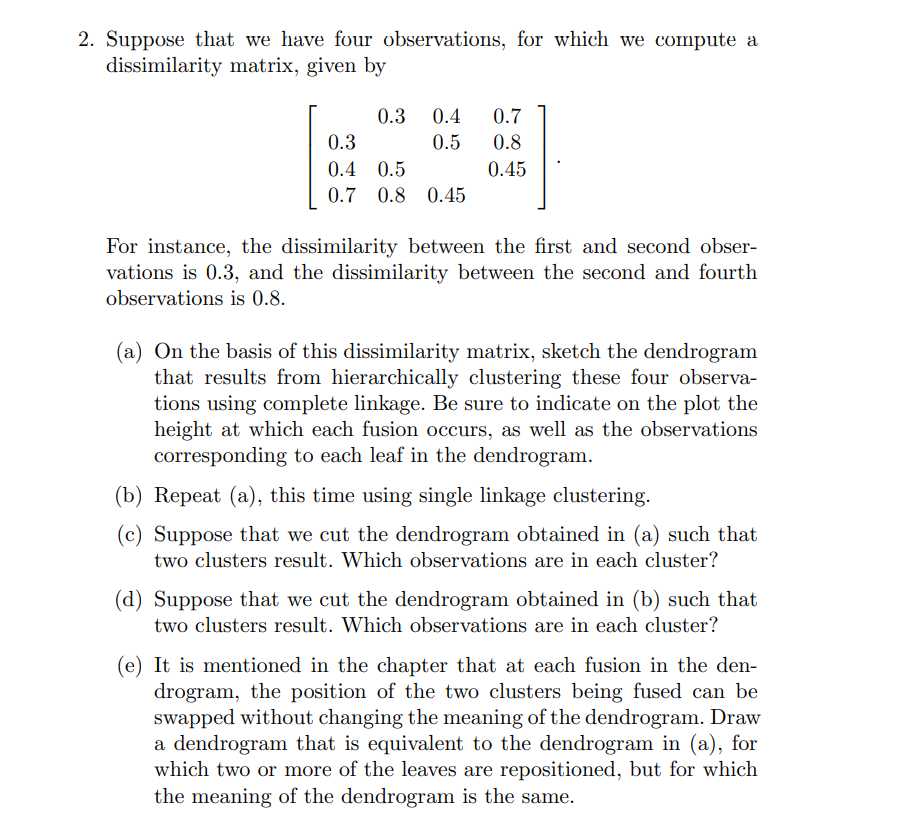

**(a)**

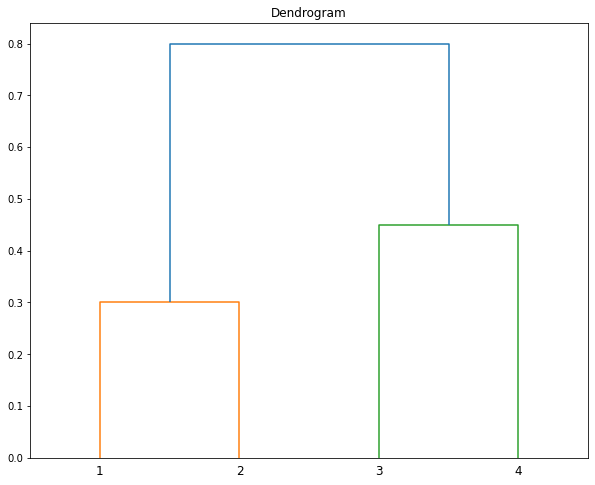

In [19]:
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7], 
    [0.3, 0.0, 0.5, 0.8], 
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])
diss_sim = squareform(dissimilarity_matrix)
linkage_mat = linkage(diss_sim, "complete")
fig = plt.figure(figsize=(10,8))
dendrogram(linkage_mat, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

**(b)**

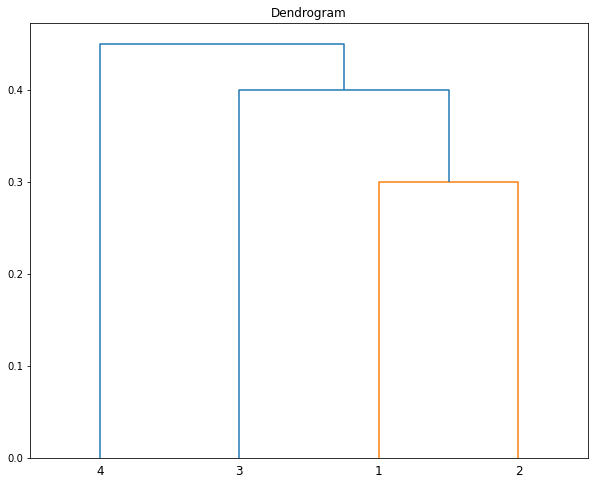

In [20]:
linkage_mat = linkage(diss_sim, "single")
fig = plt.figure(figsize=(10,8))
dendrogram(linkage_mat, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

**(c)**

Observations 1 and 2 will be in Cluster A <br>
Observations 3 and 4 will be in Cluster B.

**(d)**

Observations 1 and 2 and 3 will be in Cluster A <br>
Observations 4 will be in Cluster B.

**(e)**

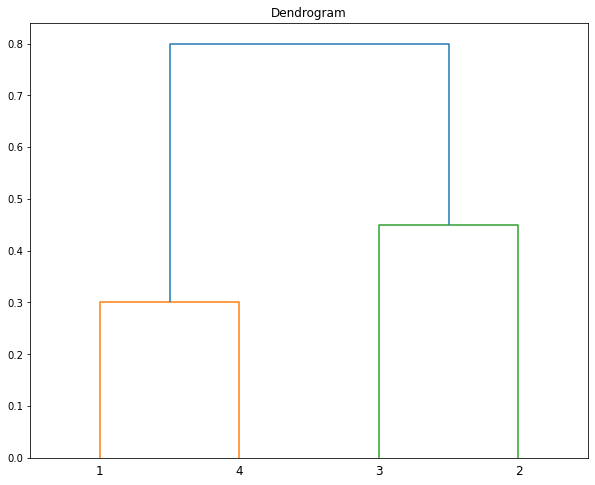

In [21]:
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7], 
    [0.3, 0.0, 0.5, 0.8], 
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])
diss_sim = squareform(dissimilarity_matrix)
linkage_mat = linkage(diss_sim, "complete")
fig = plt.figure(figsize=(10,8))
dendrogram(linkage_mat, labels=["1", "4", "3", "2"])
plt.title("Dendrogram")
plt.show()